# COSC 437 Data Mining Week 4 - Gradient Descent Method
Gradient Descent is an optimization algorithm used to minimize the cost function of machine learning models. It iteratively adjusts model parameters (weights) to find the optimal solution by moving them in the direction that reduces the error. This technique is commonly applied in training machine learning models like linear regression, logistic regression, and deep neural networks.

In a typical machine learning problem, the cost function represents how well the model performs on a set of data. For example, in linear regression, the cost function measures the squared difference between predicted and actual values. Gradient Descent helps find the set of parameters that minimize this cost function, yielding a model with better predictive performance.

## The Direction of the Descent
The core idea behind Gradient Descent is that the slope of the cost function provides the direction in which to update the parameters. Mathematically, the gradient is the vector of partial derivatives of the cost function with respect to the model's parameters. By computing the gradient, we can determine how to adjust the parameters to reduce the cost.


### Gradient Descent for Linear Regression
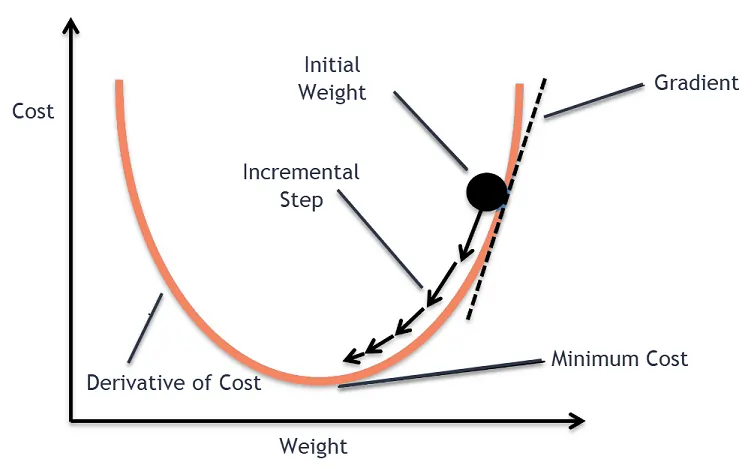

For a simple linear regression problem with one feature, the predictive function 
$$f_\theta(x) = \theta_0 +\theta_1 x$$

The cost function (Mean Squared Error) is:
$$ J(\theta_0, \theta_1) = \frac{1}{m} \sum_{i=1}^{m} \left( f_\theta(x^{(i)}) - y^{(i)} \right)^2 $$

Gradient descent updates for parameters
$$\theta_0 := \theta_0 - \alpha \frac{2}{m} \sum_{i=1}^{m} \left( f_\theta(x^{(i)}) - y^{(i)} \right)$$
$$\theta_1 := \theta_1 - \alpha \frac{2}{m} \sum_{i=1}^{m} \left( f_\theta(x^{(i)}) - y^{(i)} \right) x^{(i)}$$

Where $\alpha$ is known as the *learning rate*.

### Gradient Descent for Logistic Regression
For logisctic regression
$$ f_\theta(x) = \frac{1}{1 + e^{-\theta^T x}}$$

The cost function (Log-Loss / Cross-Entropy):
$$J(\theta) = \frac{1}{m} \sum_{i=1}^{m} \left[ -y^{(i)} \log(f_\theta(x^{(i)})) - (1 - y^{(i)}) \log(1 - f_\theta(x^{(i)})) \right]$$ 

Gradient descent updates for parameters
$$ \theta_j := \theta_j - \alpha \frac{1}{m} \sum_{i=1}^{m} \left( f_\theta(x^{(i)}) - y^{(i)} \right) x_j^{(i)}$$

These gradients provide the direction of the steepest ascent. To minimize the cost function, Gradient Descent updates the parameters in the opposite direction of the gradient, moving downhill:


Gradient Descent in Vector Form:
$$\mathbf{\theta} := \mathbf{\theta} - \alpha \nabla_{\mathbf{\theta}} J(\mathbf{\theta})$$


## Gradient Descent Strategies
There are different strategies to perform Gradient Descent based on how much data is used to compute the gradient at each step:

**Full Batch Gradient Descent**:
Uses the entire dataset to compute the gradient at each step. This approach guarantees convergence but can be slow and computationally expensive for large datasets.


**Stochastic Gradient Descent (SGD)**:

Computes the gradient using only one training example at a time. While this makes each iteration faster, the updates can be noisy, potentially causing the algorithm to fluctuate around the minimum rather than converge smoothly.


**Mini-batch Gradient Descent**:

Combines the benefits of both batch and stochastic gradient descent by computing the gradient over a small batch of data (e.g., 32 or 64 examples). It reduces the variance in parameter updates compared to SGD while being faster than full-batch Gradient Descent.



| **Aspect**                         | **Full-Batch Gradient Descent**                              | **Mini-Batch Gradient Descent**                | **Stochastic Gradient Descent (SGD)** |
| ---------------------------------- | ------------------------------------------------------------ | ---------------------------------------------- | ------------------------------------- |
| **Gradient Calculation**           | Entire dataset                                               | A small batch of examples                      | Single example                        |
| **Convergence Speed**              | Slow (requires many iterations)                              | Faster than full-batch                         | Fastest, but can fluctuate            |
| **Memory Usage**                   | High (needs to store all data)                               | Moderate                                       | Low (processes one sample at a time)  |
| **Update Frequency**               | Once per epoch                                               | Once per mini-batch                            | After each example                    |
| **Noise in Updates**               | Low (smooth updates)                                         | Moderate                                       | High (noisy updates)                  |
| **Suitability for Large Datasets** | Less suitable                                                | Very suitable                                  | Very suitable                         |
| **Computational Cost per Update**  | High                                                         | Moderate                                       | Low                                   |
| **Risk of Overshooting Minimum**   | Low                                                          | Medium                                         | High                                  |
| **Typical Batch Size**             | Entire dataset                                               | Typically 32-256 examples                      | 1 example                             |
| **Stability in Convergence**       | Stable, slow convergence                                     | Good balance between speed and stability       | Unstable (can oscillate near minimum) |
| **Best Use Case**                  | Small to medium datasets where computation cost is not an issue | General-purpose, widely used for deep learning | Online learning or real-time updates  |

## Learning Rate
The learning rate $\alpha$ is a crucial hyperparameter that controls the size of the steps Gradient Descent takes when updating the parameters. Choosing the right learning rate is critical for the success of the algorithm.
- Small Learning Rate: A very small learning rate will lead to slow convergence. The algorithm may take a long time to reach the optimal solution because the updates are tiny. It could even get stuck in local minima or take too long to escape.
    - Example: Suppose you're training a linear regression model, but you set the learning rate $\alpha = 0.00001$. The parameter updates will be very slow, and the model might take thousands of iterations to converge.
- Large Learning Rate: A large learning rate can cause the algorithm to overshoot the minimum of the cost function. This can lead to divergent behavior where the model never converges and oscillates around the optimal solution.
    - Example: In logistic regression, if you set $\alpha=1$, the weights could jump too far, missing the optimal solution, and leading to a worse cost function value in subsequent iterations.
- Optimal Learning Rate: The ideal learning rate allows the algorithm to converge efficiently. This rate depends on the problem at hand and the cost function's curvature. In practice, learning rates are often tuned through experimentation or automated techniques like learning rate schedules.



# Neural Networks

## Introduction
A fully-connected neural network (FCNN), also known as a dense neural network, is one of the most fundamental architectures in deep learning. It consists of layers of neurons, where each neuron in one layer is connected to every neuron in the next layer. FCNNs are commonly used in classification, regression, and many machine learning problems.

In this tutorial, we’ll cover the structure of a fully-connected neural network, explain how it performs feed-forward to make predictions, and walk through back-propagation, the algorithm used to train the network by updating weights based on errors.

## Structure of a Fully-Connected Neural Network
A fully-connected neural network consists of the following components:

Input Layer: This layer takes the input data (features). Each input feature corresponds to one neuron.
Hidden Layers: These are layers between the input and output layers. Each hidden layer consists of neurons that apply a weighted sum of inputs followed by a non-linear activation function.
Output Layer: This layer produces the final output, either a single value for regression or multiple values for classification (e.g., probabilities in multi-class classification).
Each neuron in a layer is connected to every neuron in the subsequent layer via weights, which are learned during training.

## Feed-Forward
In feed-forward propagation, the network processes the input data by propagating it through the layers to produce an output.

For each neuron in the layer, calculate the weighted sum of its inputs. If $x_1, x_2, \ldots, x_n $ are the input values and $w_1, w_2, \ldots, w_n$ are the corresponding weights, the weighted sum is: 
$$z = \sum_{i=1}^{n} w_i x_i + b$$
Where $ b$ is the bias term.

Apply an activation function to the weighted sum to introduce non-linearity. Common activation functions include:
- Sigmoid: $\displaystyle\sigma(z) = \frac{1}{1 + e^{-z}}$
- ReLU: $\displaystyle f(z) = \max(0, z)$
- Tanh: $\displaystyle \tanh(z) = \frac{e^z - e^{-z}}{e^z + e^{-z}}$

Output Layer: The feed-forward process continues through the network's layers, producing an output in the final layer. The network’s prediction depends on the problem type:
- Regression: Outputs a continuous value.
- Classification: Outputs probabilities (using softmax or sigmoid).

## Back-Propagation
After making a prediction, the neural network adjusts its weights and biases using an algorithm called back-propagation. This algorithm minimizes the error (or loss) by updating the weights in the direction that reduces the loss.

Back-propagation uses the chain rule from calculus to compute the gradient layer by layer, starting from the output layer and working backwards through the network. For a weight $w$ in the network, the chain rule is used to calculate the partial derivative of the cost function with respect to that weight.

For a given neuron, the weight updates are computed as:
$$\frac{\partial J}{\partial w} = \frac{\partial J}{\partial z} \cdot \frac{\partial z}{\partial w}$$

Where:
- $z$ is the weighted sum of inputs to the neuron.
- $J$ is the cost function.

Once the gradients are computed, the weights are updated using gradient descent:
$$w := w - \alpha \frac{\partial J}{\partial w}$$

Where:
- $w$ is the weight to be updated.
- $\alpha$ is the learning rate, which controls the step size of each update.
- $\displaystyle \frac{\partial J}{\partial w}$  is the gradient of the cost function with respect to the weight.

Back-Propagation Summary:
- Compute the gradient of the cost function with respect to the output activation.
- Propagate the gradients backward through the layers using the chain rule.
- Update the weights using gradient descent.